# Digital Filters in Python

## 1. Purpose
The SciPy tutorial provides an example of [Butterworth Bandpass filter](https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html). This notebook is intended to extend the tutorial so that the filter can be applied to a .wav file.

## 2. Overview
A Band Pass Filter (BPF) and a Low Pass Filter (LPF) are implemented in Python. The following figures summarize the results obtained from the implementation.

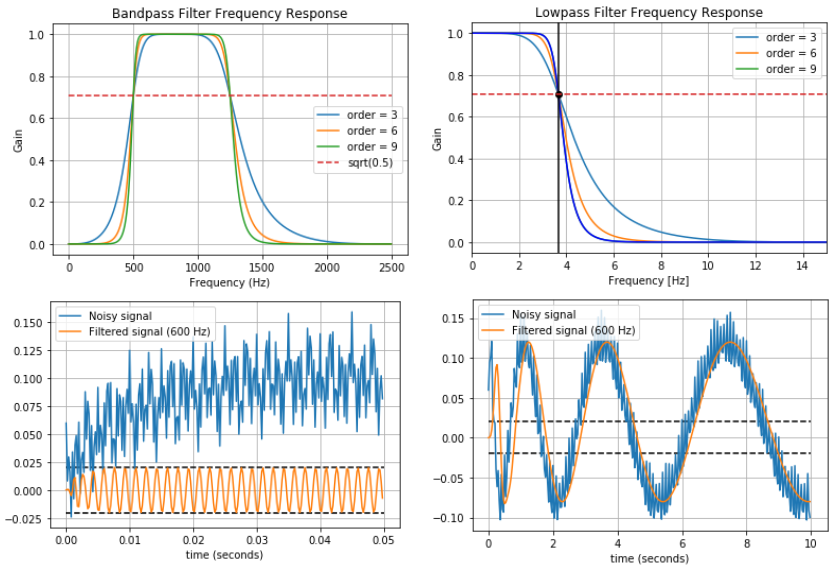

## 3. Band Pass Filter (Butterworth)

### 3.1. Butterworth Bandpass in Scipy Tutorial
This section is a replica of [Butterworth Bandpass](https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html) with my own tweak. Basically, the code is identical to [test-scipy-butterworth_bandpass_filter.py](./test-scipy-butterworth_bandpass_filter.py). Differences are:
* %matplotlib inline
* More comments
* Different layout

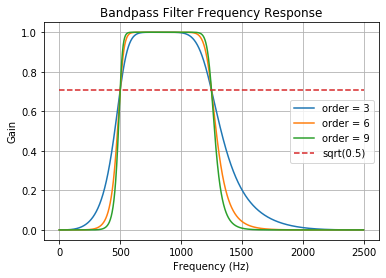

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency is half the sampling rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    #b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

# Sample rate and desired cutoff frequencies (in Hz).
fs      = 5000.0
lowcut  = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    # Generate (Digital) Frequency Response
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.title("Bandpass Filter Frequency Response")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')

/home/aimldl/anaconda3/envs/hula/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


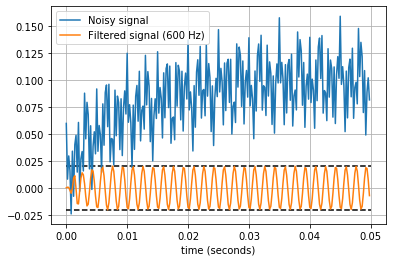

In [6]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter a noisy signal.
T = 0.05
nsamples = T * fs
t  = np.linspace(0, T, nsamples, endpoint=False)
a  = 0.02
f0 = 600.0
x  = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

## 4. Low Pass Filter (Butterworth)

### 4.1. LPF Implementation in Stackoverflow 
This section represents my tweak of code presented by Warren Weckesser at [Creating lowpass filter in SciPy - understanding methods and units](https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
). Basically, the code is identical to [test-scipy-butterworth_lowpass_filter.py](.test-scipy-butterworth_lowpass_filter.py). Differences are:
* %matplotlib inline
* More comments
* Different layout

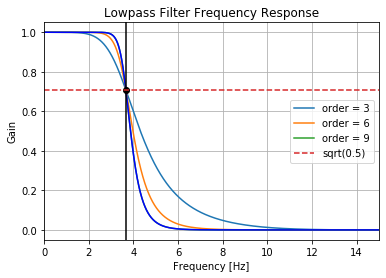

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_lowpass(cutoff, fs, order)
    w, h = freqz(b, a, worN=8000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.legend(loc='best')

/home/aimldl/anaconda3/envs/hula/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


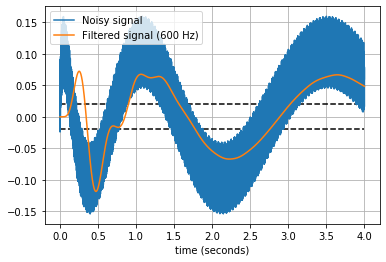

In [17]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter a noisy signal.
T = 4.00
nsamples = T * fs
t  = np.linspace(0, T, nsamples, endpoint=False)
a  = 0.02
f0 = 600.0
x  = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y  = butter_lowpass_filter(x, cutoff, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid()
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

## 5. Applying the Filters to Real Signals

### 5.1. An Example WAV File
The Butterworth BPF and LPF implemented earlier are applied to a wav file. [english-0.wav](./english-0.wav) is used as an example. The following image is captured from Audacity, an open-source audio editing program.

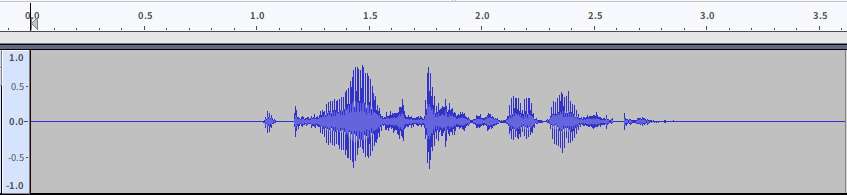

To play the .wav file, use the aplay (audio play) command which also provides a basic information about the file. You'll hear "A car is faster than a bicycle".

In [18]:
! aplay english-0.wav

Playing WAVE 'english-0.wav' : Signed 16 bit Little Endian, Rate 16000 Hz, Mono


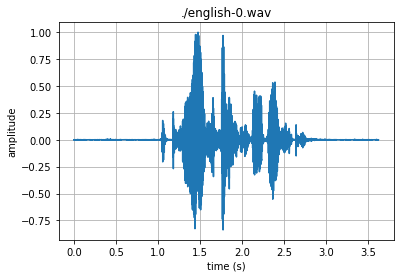

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile as wav

def normalize( data ):
    '''
    Peak normalization of the input audio signal
    i.e. normalize the input audio signal or data with the maximum value
    '''
    y_max      = max( abs(data) )
    data       = data / y_max
    return data

# Read in the .wav file
file     = './english-0.wav'
fs, data = wav.read( file ) # fs is sampling frequency or rate.
data     = normalize( data )

# Prepare to plot the figure
n_samples  = len( data )
# Convert samples to time
t          = np.arange( n_samples ) / float( fs )  # 0~ (n_samples-1)
        
h = plt.figure()
plt.plot( t, data )
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title( file )
plt.grid()

### 5.2. Shaping a New Butterworth BPF at 16kHz
As the sampling frequency of the waveform is 16kHz, the Nyquist frequency is 8kHz. The cutoff frequency cannot exceed the Nyquist frequency. Let's shape a BPF in the same range of 500~1250Hz or [500, 1250] and see the frequency response.

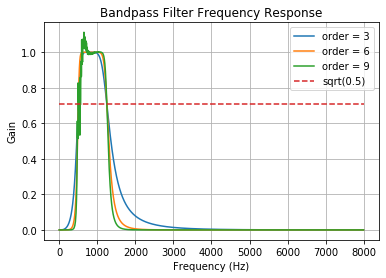

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency is half the sampling rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    #b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

# Sample rate and desired cutoff frequencies (in Hz).
fs      = 16000.0 # Hz
lowcut  = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    # Generate (Digital) Frequency Response
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.title("Bandpass Filter Frequency Response")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')

Compare the two BPFs and notice "the higher the order, the steeper the slope gets." and the x-axis ranges from 0 Hz to the Nyquist frequency.

### 5.3. Applying Butterworth BPF to a WAV File
As an extended example of the Butterworth BPF tutorial, the filter is applied to the .wav file.

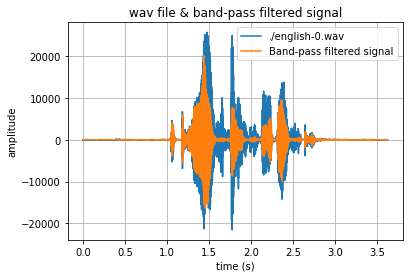

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile as wav

def normalize( data ):
    '''
    Peak normalization of the input audio signal
    i.e. normalize the input audio signal or data with the maximum value
    '''
    y_max      = max( abs(data) )
    data       = data / y_max
    return data

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
#fs      = 16000.0 # Hz
lowcut  = 500.0
highcut = 1250.0

# Read in the .wav file
file     = './english-0.wav'
fs, data = wav.read( file ) # fs is sampling frequency or rate.
#data     = normalize( data )

# Prepare to plot the figure
n_samples  = len( data )
# Convert samples to time
t          = np.arange( n_samples ) / float( fs )  # 0~ (n_samples-1)

h = plt.figure()
plt.clf()
plt.plot( time, data, label=file )

y = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Band-pass filtered signal')

plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title( 'wav file & band-pass filtered signal' )
plt.grid()
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

### 5.4. Shaping a New Butterworth LPF at 16kHz
A LPF is shaped for the waveform at 16kHz and the cutoff frequency less than the Nyquist frequency of 8kHz. Again, set the cutoff frequency to 1250Hz as opposed to [500, 1250] for BPF and see the frequency response.

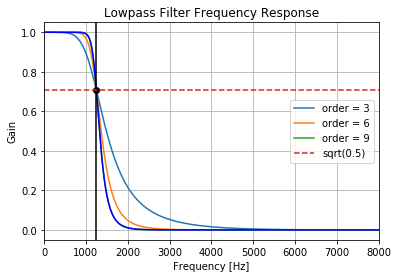

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency is half the sampling rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Sample rate and desired cutoff frequencies (in Hz).
fs      = 16000.0 # Hz
cutoff  = 1250.0   # desired cutoff frequency of the filter, Hz

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_lowpass(cutoff, fs, order)
    # Generate (Digital) Frequency Response
    w, h = freqz(b, a, worN=8000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.legend(loc='best')

Like other filters, the higher the order, the steeper the slope gets. Notice also that all the shapes pass sqrt(0.5) regardless of order.

### 5.5. Applying Butterworth LPF to a WAV File
A is applied to the .wav file.

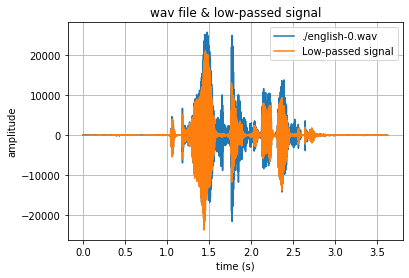

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile as wav

def normalize( data ):
    '''
    Peak normalization of the input audio signal
    i.e. normalize the input audio signal or data with the maximum value
    '''
    y_max      = max( abs(data) )
    data       = data / y_max
    return data

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency is half the sampling rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Sample rate and desired cutoff frequencies (in Hz).
#fs      = 16000.0 # Hz
cutoff  = 1250.0   # desired cutoff frequency of the filter, Hz

# Read in the .wav file
file     = './english-0.wav'
fs, data = wav.read( file ) # fs is sampling frequency or rate.
#data     = normalize( data )

# Prepare to plot the figure
n_samples  = len( data )
# Convert samples to time
t          = np.arange( n_samples ) / float( fs )  # 0~ (n_samples-1)

h = plt.figure()
plt.clf()
plt.plot( time, data, label=file )

y = butter_lowpass_filter(data, cutoff, fs, order=6)
plt.plot(t, y, label='Low-passed signal')

plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title( 'wav file & low-passed signal' )
plt.grid()
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()